# Dataset avvistamenti UFO

**Attenzione**: Nelle date (campo 'datetime') è presente anche come ora 24:xx che però causa problemi con 
        tutto quello che parsa le date. Ho fatto 'sostituisci tutto' 24 -> 00 ma non è proprio corretto
        perchè bisogna anche aumentare il giorno  
**Attenzione**: Il file 'sample.csv' è il dataset 'scrubbed.csv' ma con solo 1 riga ogni 10, è meglio per testare visto che il dataset originale sono circa 80000 righe e ci mette molto per calcolare alcune cose

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OUT_FOLDER = 'grafici'   # il nome della cartella dove verranno salvati i .png dei grafici
FIGURE_SIZE = (20, 8)    # la dimensione dei grafici da generare

%matplotlib inline

In [2]:
DATASET = 'sample_ufos.csv'
data = pd.read_csv(DATASET)

## Avvistamenti per ora del giorno
Qui c'è il codice per generare i grafici del numero di avvistamenti per ora del giorno. Sono più esperimenti, ci sono con tutte le ore specificate oppure con intervalli di 3 ore (leggermente shiftati per avere le 12:00 al centro).
Per modificare i colori cambiate la variabile 'gradients'

In [4]:
# Questo è leeeento
data['datetime'] = pd.to_datetime(data['datetime'])

In [5]:
counts = data['datetime'].dt.hour.value_counts()

In [6]:
hour_groups = [[23, 0, 1]] + [[h, h+1, h+2] for h in range(2, 23, 3)]
def find_group(hour):
    for i, g in enumerate(hour_groups):
        if hour in g: return i
    return -1
dt = data['datetime']
grouped_hours = dt.groupby(lambda i: find_group(dt.iloc[i].hour))

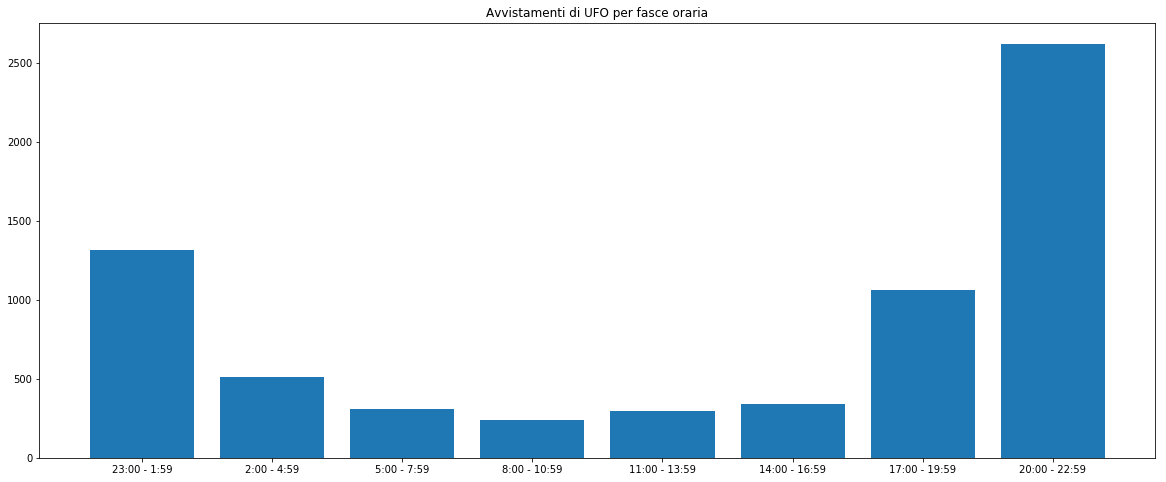

In [172]:
# Grafico degli avvistamenti per ora del giorno (a colori)
grouped_hours_counts = grouped_hours.size()

plt.figure(figsize=FIGURE_SIZE)
plt.title('Avvistamenti di UFO per fasce oraria')
bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.get_values())
labels = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups]
plt.xticks(range(len(labels)), labels)

plt.savefig(f'{OUT_FOLDER}/AvvistamentiOraDelGiorno/SenzaColori.png')
plt.show()

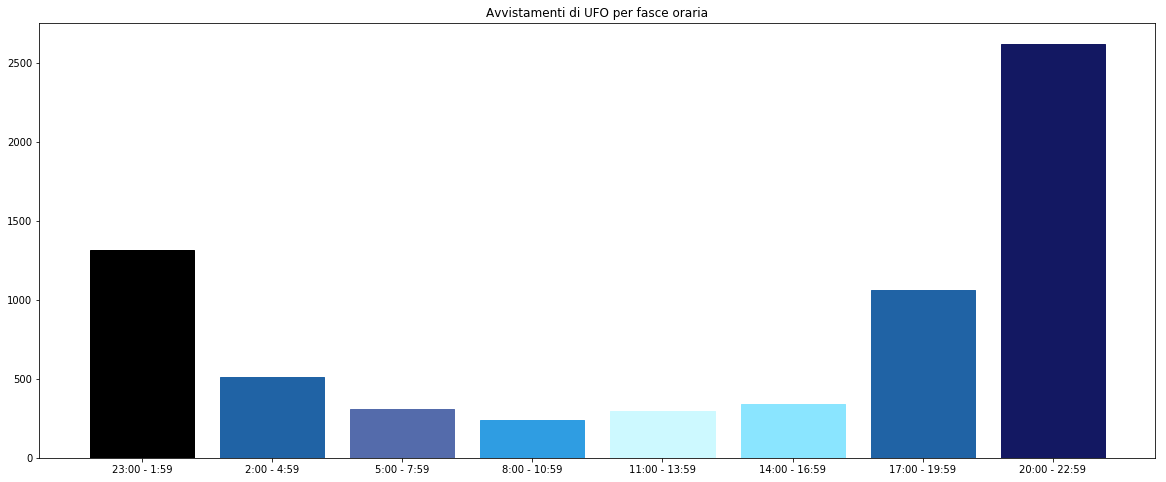

In [173]:
gradients = [
    (0, 0, 0),      # 23:00 -  1:59
    (32,99,165),    #  2:00 -  4:59
    (84, 107, 171),       #  5:00 - 7:59
    (47,157,226),      #  8:00 - 10:59
    (205,249,255),     # 11:00 - 13:59
    (138,229,255),     # 14:00 - 16:59
    (32,99,165),       # 17:00 - 19:59
    (19, 24, 98)# (84, 107, 171)     # 20:00 - 22:59
]
gradients = [(r/255, g/255, b/255, 1.0) for (r, g, b) in gradients]

plt.figure(figsize=FIGURE_SIZE)
plt.title('Avvistamenti di UFO per fasce oraria')
bars = plt.bar(grouped_hours_counts.index, grouped_hours_counts.get_values())
labels = [f'{starth}:00 - {endh}:59' for (starth, _, endh) in hour_groups]
plt.xticks(range(len(labels)), labels)

for bar_i, index in enumerate(grouped_hours_counts.index):
    bars[bar_i].set_color(gradients[index])

plt.savefig(f'{OUT_FOLDER}/AvvistamentiOraDelGiorno/ConColori.png')
plt.show()

# Avvistamenti UFO negli anni per paese
Questi che seguono rappresentano la stessa cosa, il numero di avvistamenti negli anni per paese. I dati sono stati normalizzati per milioni di abitanti per paese. I paesi scelti sono quelli che hanno un po' di avvistamenti (almeno 10, circa). 
I grafici qui sono (in ordine):
- A linee
- A linee in small multiple
- Barchart verticale
- Barchart orizzontale

In [116]:
# Questi dati servono per creare i grafici che seguono sugli avvistamenti negli anni per paesi diversi
# popolazione e milioni di abitanti (nel 2014)
countries_to_consider = {
    "us": 318,
    "ca": 35,
    "gb": 64,
    "au": 23,
    #"in": 255,
    #"mx": 120,
    #"nz": 4.5,
    #"nl": 16.8,
    #"br": 202.8
}
# I nomi estesi dei paesi, per creare una legenda nel grafico
countries_names = {
    "us": "Stati Uniti",
    "ca": "Canada",
    "gb": "Regno Unito",
    "au": "Australia",
    "in": "Indonesia",
    "mx": "Mexico",
    "nz": "Nuova Zelanda",
    "nl": "Paesi Bassi",
    "br": "Brasile",
}

countries_data = pd.crosstab(
    data['datetime'].dt.year, 
    data['country']
).loc[:, countries_to_consider.keys()]

# Normalizza per popolazione
for country, population in countries_to_consider.items():
    countries_data[country] /= population

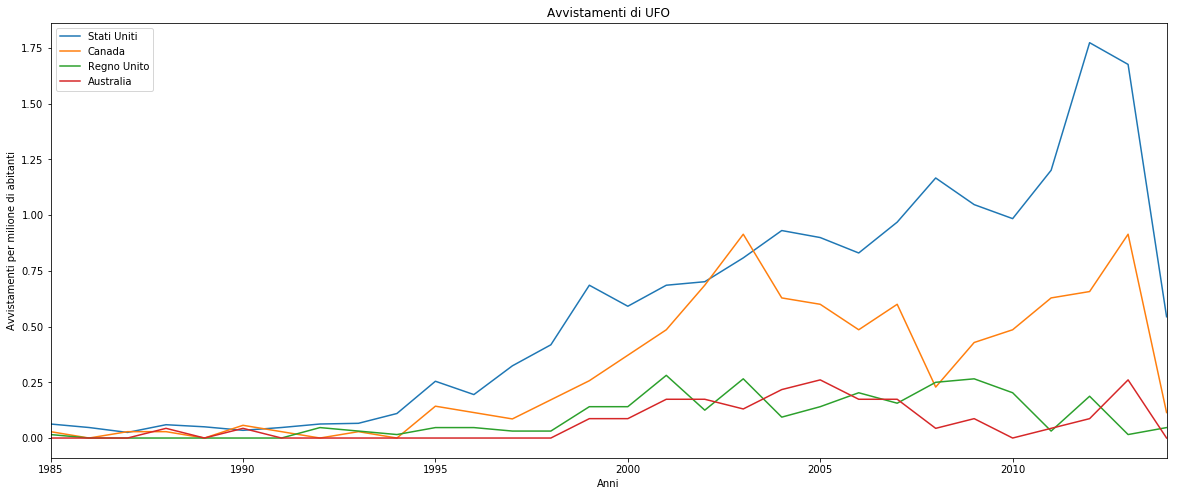

In [119]:
countries_data.plot(figsize=FIGURE_SIZE, xlim=(1985, 2014))
plt.title('Avvistamenti di UFO')
plt.xlabel('Anni')
plt.ylabel('Avvistamenti per milione di abitanti')

for label in plt.legend().get_texts():
    label.set_text(countries_names[label.get_text()])

plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/Lines.png')
plt.show()

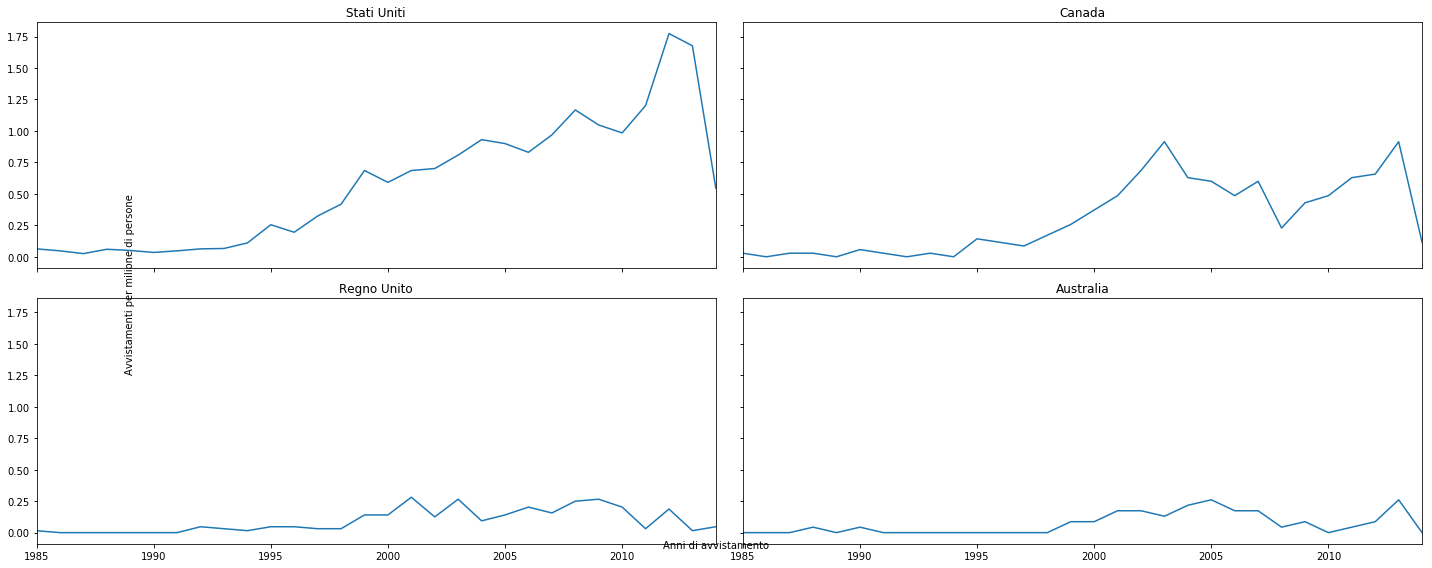

In [120]:
# Versione con small multiples
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generatasono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
ax = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), ax):
    countries_data[country].plot(ax=ax)
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/Lines_SmallMultiple.png')
plt.tight_layout()
plt.show()

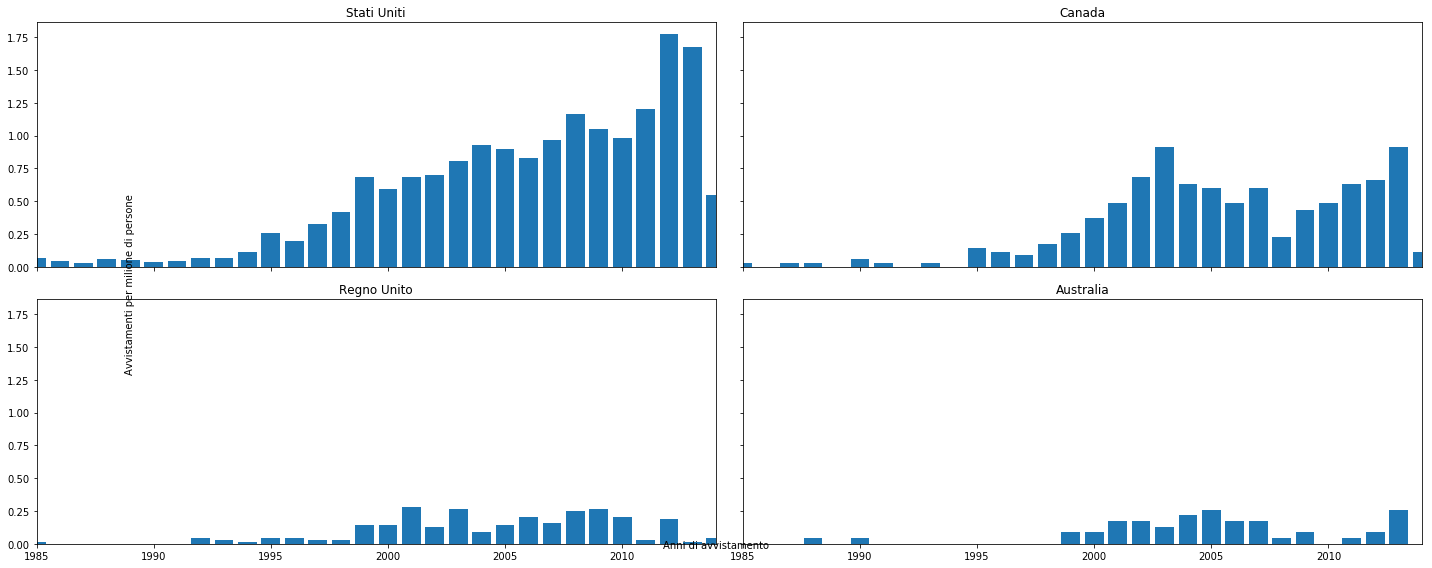

In [174]:
# Versione bar chart
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generata sono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
ax = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), ax):
    ax.bar(countries_data[country].index, countries_data[country].get_values())
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/BarChart_Verticale.png')
plt.tight_layout()
plt.show()

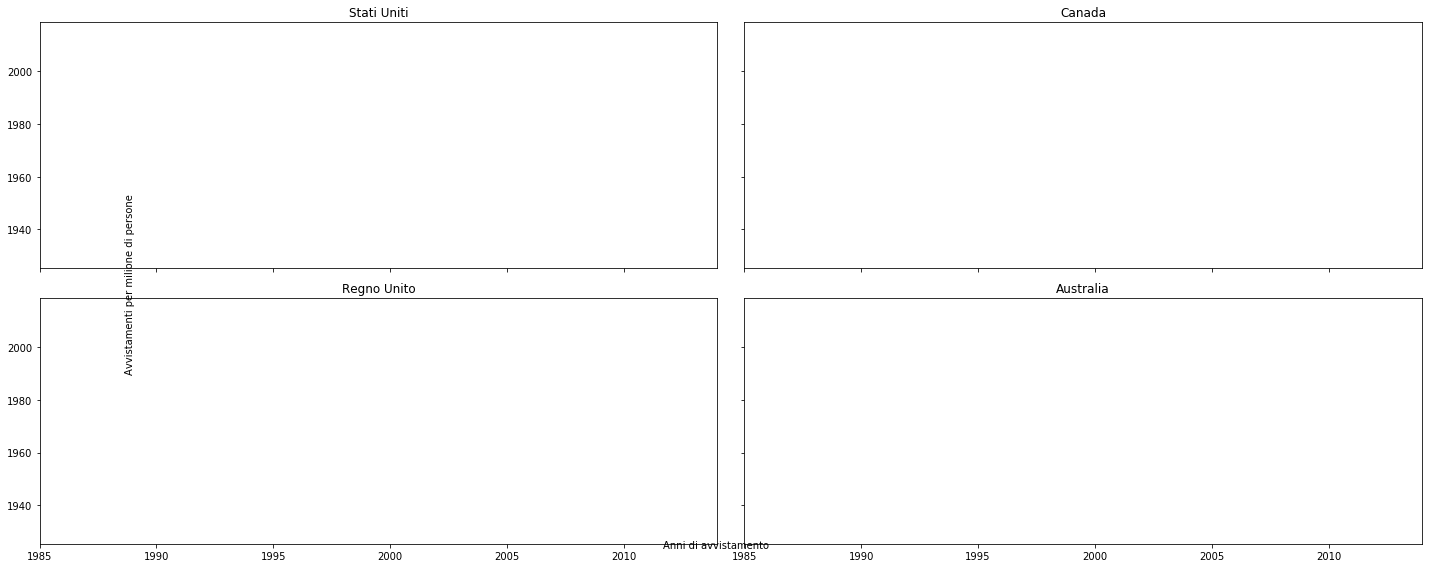

In [175]:
# Versione bar chart in orizzontale
# ATTENTO: Sul notebook le scritte degli assi sembrano sbagliate, ma se guardi l'immagine generata sono giuste!

fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    sharex=True, 
    sharey=True, 
    figsize=FIGURE_SIZE
)

# 'ax' normalmente è una lista di liste. così lo converto in una lista normale
ax = [item for sublist in axes for item in sublist] 

for country, ax in zip(countries_to_consider.keys(), ax):
    ax.barh(countries_data[country].index, countries_data[country].get_values())
    ax.set_title(countries_names[country])
    ax.set_xlim((1985, 2014))
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.text(0.5, 0.04, 'Anni di avvistamento', ha='center')
fig.text(0.089, 0.5, 'Avvistamenti per milione di persone', va='center', rotation='vertical')
    
plt.savefig(f'{OUT_FOLDER}/AvvistamentiPerNazioneNegliAnni/BarChart_Orizzontale.png')
plt.tight_layout()
plt.show()

# Quanto dura un'avvistamento?
Alcuni grafici che mostrano quanto durano gli avvistamenti e se è cambiata la durata nel tempo

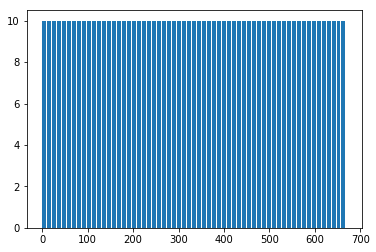

300.00        701
120.00        599
600.00        541
60.00         497
180.00        414
900.00        331
30.00         316
10.00         280
1200.00       254
5.00          250
1800.00       230
3600.00       215
15.00         191
240.00        176
20.00         167
2.00          163
3.00          125
2700.00        95
7200.00        94
45.00          86
4.00           72
1.00           62
420.00         61
90.00          51
1500.00        48
8.00           48
360.00         43
480.00         38
10800.00       37
6.00           37
             ... 
145.00          1
2940.00         1
380.00          1
23.00           1
108.00          1
0.20            1
3634.00         1
1233.00         1
43200.00        1
1980.00         1
599.00          1
1860.00         1
309.00          1
840.00          1
75.00           1
39.00           1
41.00           1
1170.00         1
212.00          1
510.00          1
6312000.00      1
1740.00         1
210.00          1
5280.00         1
11700.00  

In [177]:
bins = [1, 2, 3, 5, 10, 20, 60, 120, 60*5, 1000000000]
def find_bin(x):
    return next((i for i, current_bin in enumerate(bins) if x <= current_bin))
counts = data['duration (seconds)'].groupby(lambda x: x // 10).size()

plt.bar(counts.index, counts.get_values())

plt.show()
data['duration (seconds)'].value_counts()